In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline

In this project I aim to create a model that predicts Heart Disease. The dataset I used to do this was taken directly from Kaggle's publicly available datasets. The primary metrics I will use to determine model performance are the accuracy score and the f1-score, which can be generated from sklearn. Before I get into creating these models I will do some exploratory data analysis to examine and better visualize the features provided in this dataset. Then I will instantiate different supervised learning models, including K-Nearest Neighbors, Logistic Regression, and Support Vector Machines.   

In [2]:
df = pd.read_csv('heart.csv')

#The dataset contains the following features:
# 1. age(in years)
# 2. sex: (1 = male; 0 = female)
# 3. cp: chest pain type
# 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
# 5. chol: serum cholestoral in mg/dl
# 6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# 7. restecg: resting electrocardiographic results
# 8. thalach: maximum heart rate achieved
# 9. exang: exercise induced angina (1 = yes; 0 = no)
# 10. oldpeak: ST depression induced by exercise relative to rest
# 11. slope: the slope of the peak exercise ST segment
# 12. ca: number of major vessels (0-3) colored by flourosopy
# 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# 14. target: prescence of heart disease, 1 means yes and 0 means no 

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()
# No missing values! Thank you Kaggle/UCI.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
print('Rows: ',df.shape[0])
print('Columns: ',df.shape[1])

Rows:  303
Columns:  14


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj,

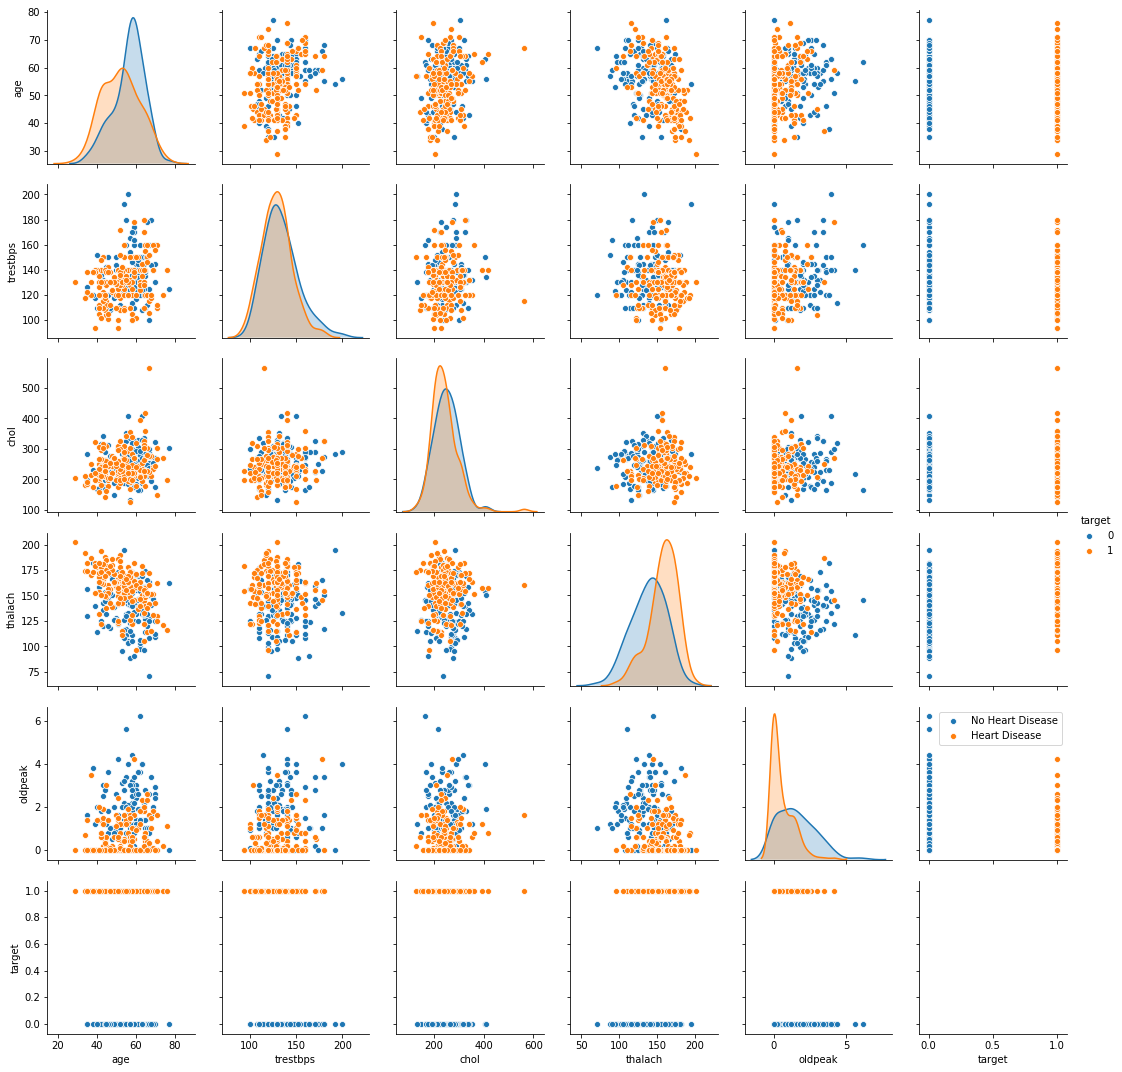

In [7]:
# Curious to see how the continuous features relate to each other with respect to presence of heart disease  

continuous = ['age','trestbps','chol','thalach','oldpeak','target']
sns.pairplot(df[continuous], hue='target')
plt.legend(['No Heart Disease', 'Heart Disease']);

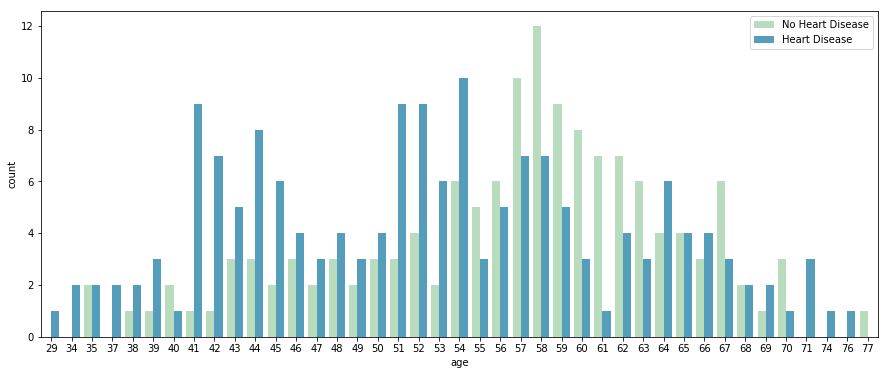

In [8]:
# Age distribution 
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.legend(['No Heart Disease', 'Heart Disease'], loc=1)
plt.show()

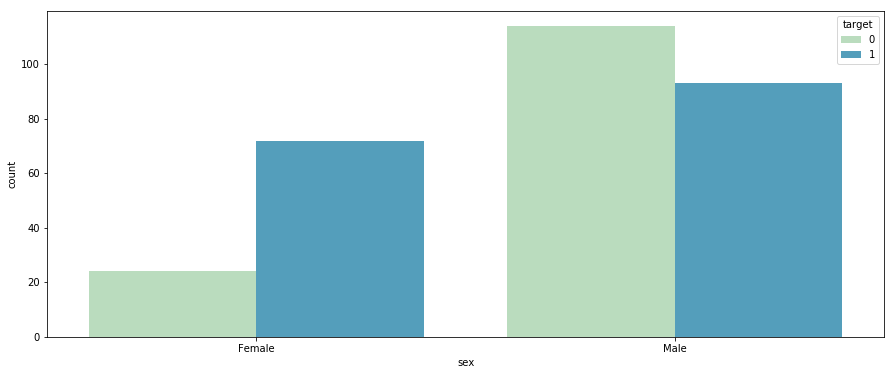

In [9]:
plt.figure(figsize=(15,6)) # (1 = male; 0 = female)
sns.countplot(x='sex',data = df, hue = 'target',palette='GnBu')
plt.xticks([0,1],['Female','Male'])
plt.show()

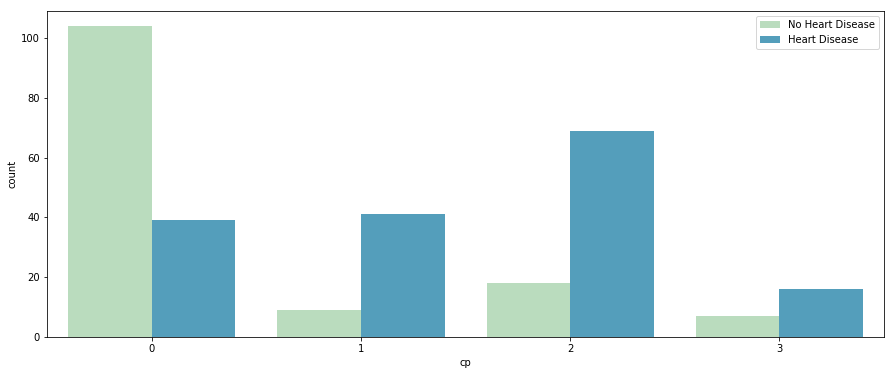

In [10]:
plt.figure(figsize=(15,6)) # Chest Pain: 0 = None, 3 = A LOT!
sns.countplot(x='cp',data = df, hue = 'target',palette='GnBu')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

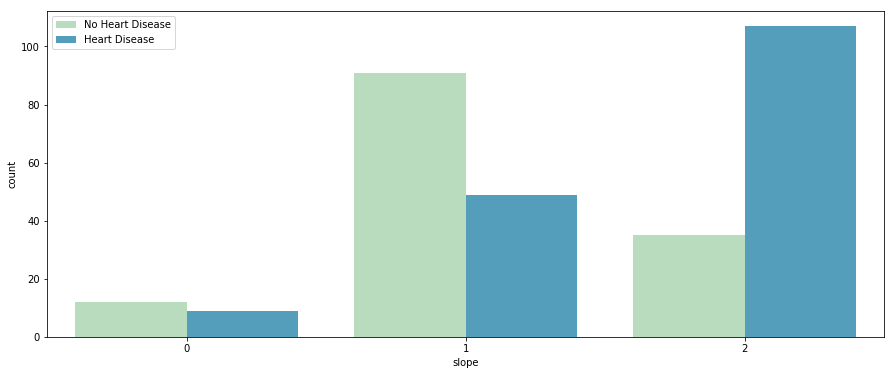

In [11]:
plt.figure(figsize=(15,6)) # Slope: the slope of the peak exercise ST segment
sns.countplot(x='slope',data = df, hue = 'target',palette='GnBu')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

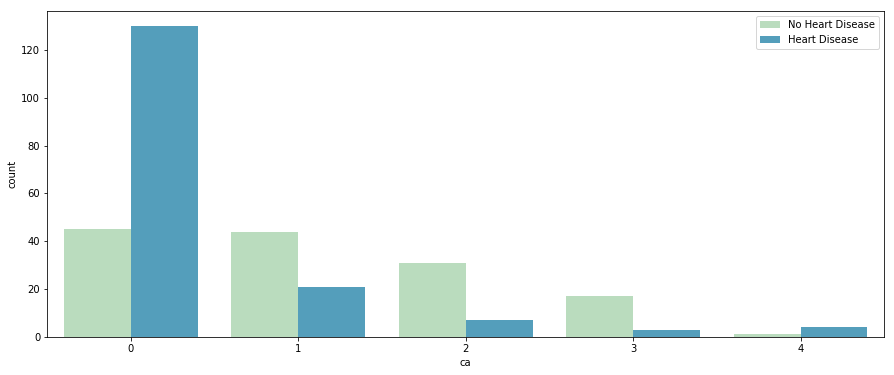

In [12]:
plt.figure(figsize=(15,6)) # ca: number of major vessels (0-3) colored by flourosopy
sns.countplot(x='ca',data = df, hue = 'target',palette='GnBu')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

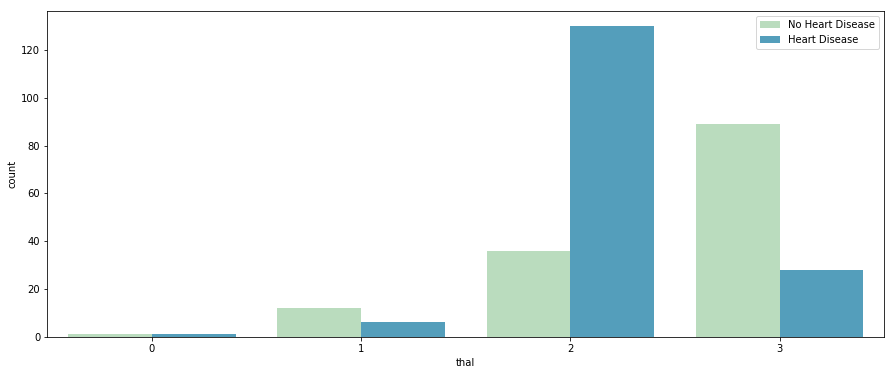

In [13]:
plt.figure(figsize=(15,6)) # thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
sns.countplot(x='thal',data = df, hue = 'target',palette='GnBu')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

In [14]:
# Begin making models

X = df.drop('target',axis=1)
y = df['target']

In [15]:
# Simple kNN with GridSearch for optimal n_neighbors

N = [1,2,3,4,5]
param_grid = {'n_neighbors': N}

# Instantiate the kNN classifier: knn
knn = KNeighborsClassifier()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Instantiate the GridSearchCV object: knn_cv
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit it to the training data
knn_cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = knn_cv.predict(X_test)

# Print the optimal parameters and best score
print("Tuned N-Neighbors Parameter: {}".format(knn_cv.best_params_))
print("Tuned kNN Accuracy: {}".format(knn_cv.best_score_))
print(classification_report(y_test, y_pred))

Tuned N-Neighbors Parameter: {'n_neighbors': 3}
Tuned kNN Accuracy: 0.6818181818181818
             precision    recall  f1-score   support

          0       0.62      0.69      0.66        29
          1       0.69      0.62      0.66        32

avg / total       0.66      0.66      0.66        61



In [ ]:
# Simple Logistic Regression with GridSearch for optimal C and regression penalty

c_space = np.logspace(-10, 8, 20)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg_cv.predict(X_test)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))
print(classification_report(y_test, y_pred))

In [ ]:
# Simple Support Vector Classifier with GridSearch for optimal C and gamma

c_space = np.logspace(-10, 8, 20)
param_grid = {'C': c_space, 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

# Instantiate the support vector machine classifier: SVM
SVM = SVC()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
SVM_cv = GridSearchCV(SVM, param_grid, cv=5)

# Fit it to the training data
SVM_cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = SVM_cv.predict(X_test)

# Print the optimal parameters and best score
print("Tuned SVC Parameter: {}".format(SVM_cv.best_params_))
print("Tuned SVC Accuracy: {}".format(SVM_cv.best_score_))
print(classification_report(y_test, y_pred))

In [ ]:
# Now let's try kNN with scaled values using StandardScaler

# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Parameter Grid 
N = [1,2,3,4,5,6,7]
param_grid = {'knn__n_neighbors': N}

# Instantiate the GridSearchCV object: knn_scaled
knn_scaled = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the pipeline to the training set
knn_scaled.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = knn_scaled.predict(X_test)


# Compute and print metrics
print("Tuned N-Neighbors Parameter: {}".format(knn_scaled.best_params_))
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

In [ ]:
# SVC with scaled values using StandardScaler

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[0.01, 0.1, 1, 10, 100],
              'SVM__gamma':[1, 0.1, 0.01, 0.001]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
SVC_scaled = GridSearchCV(pipeline, parameters)

# Fit to the training set
SVC_scaled.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = SVC_scaled.predict(X_test)

# Compute and print metrics
print("Tuned Model Parameters: {}".format(SVC_scaled.best_params_))
print("Accuracy: {}".format(SVC_scaled.score(X_test, y_test)))
print(classification_report(y_test, y_pred))